In [89]:
# Import dependencies
import tensorflow as tf
from tensorflow import keras
import pandas as pd

import matplotlib.pyplot as plt
import missingno as mso

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler


In [90]:
# Import data from github
df_train = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/test.csv')
df_check = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/gender_submission.csv')

print("Full train dataset shape is {}".format(df_train.shape))
df_train.head(3)

Full train dataset shape is (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [91]:
# Explore dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

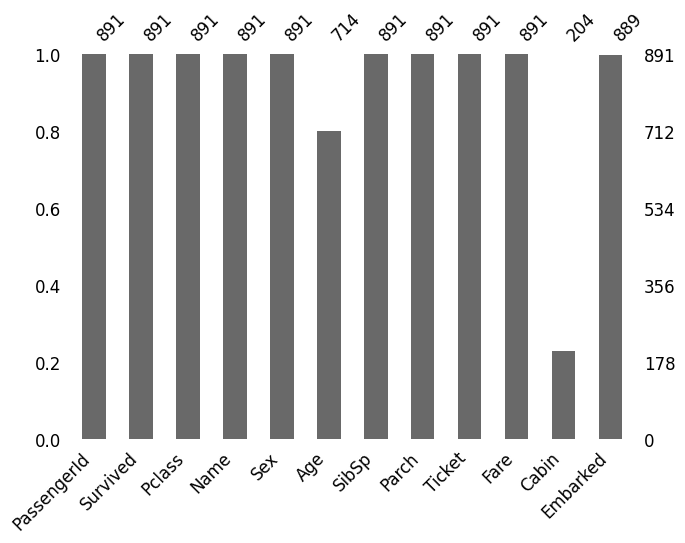

In [92]:
# Missing values
plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(df_train,ax=ax_train,fontsize = 12)

In [93]:
# Preprocessing

# Definir output (y_train)
y_train = df_train["Survived"]


# Definir inputs
input_features = list(df_train.columns)
# Suppression des inputs PassengerId, Name, Ticket, Cabin, Embarked, Survived, Fare
input_features.remove("PassengerId")
input_features.remove("Name")
# input_features.remove("Age")
input_features.remove("Ticket")
input_features.remove("Cabin")
input_features.remove("Embarked")
input_features.remove("Survived")
input_features.remove("Fare")

print(f"Input features: {input_features}")

Input features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']


In [94]:
# Retraitement de la colonne Age : remplacer les valeurs manquantes par la moyenne
mean_age = round(df_train['Age'].mean(), 0)
df_train['Age'] = df_train['Age'].fillna(mean_age)
# df_test['Age'] = df_test['Age'].fillna(mean_age)

In [95]:
# Retraitement de la colonne Sex : remplacer male par 0 et female par 1
label_encoder_sex = LabelEncoder()
df_train['Sex'] = label_encoder_sex.fit_transform(df_train['Sex'])
# df_test['Sex'] = label_encoder_sex.fit_transform(df_test['Sex'])

In [96]:
# Definition du dataframe x_train pour l'entrainement du modèle
x_train = df_train[input_features]
x_train.head(3)

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.0,1,0
1,1,0,38.0,1,0
2,3,0,26.0,0,0


In [97]:
# import seaborn as sns
# top_features = df_train.corr()[['Survived']].sort_values(by=['Survived'],ascending=False).head(30)
# plt.figure(figsize=(5,10))
# sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [98]:
# # Standardiser les donnees
# # sc = StandardScaler()
# # sc = RobustScaler()
# sc = MinMaxScaler()
# x_train = sc.fit_transform(x_train)
# # x_test = sc.fit_transform(x_test)

# x_train

       Pclass  Sex     Age  SibSp     Parch
0    1.000000  1.0  0.2750  0.125  0.000000
1    0.333333  0.0  0.4750  0.125  0.000000
2    1.000000  0.0  0.3250  0.000  0.000000
3    0.333333  0.0  0.4375  0.125  0.000000
4    1.000000  1.0  0.4375  0.000  0.000000
..        ...  ...     ...    ...       ...
886  0.666667  1.0  0.3375  0.000  0.000000
887  0.333333  0.0  0.2375  0.000  0.000000
888  1.000000  0.0  0.3750  0.125  0.333333
889  0.333333  1.0  0.3250  0.000  0.000000
890  1.000000  1.0  0.4000  0.000  0.000000

[891 rows x 5 columns]


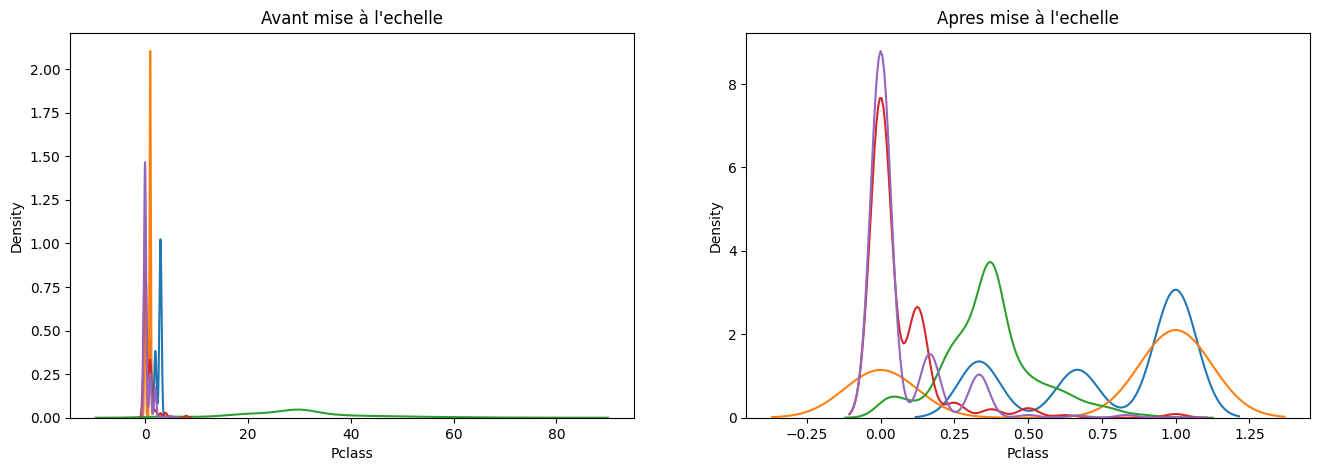

In [99]:
import seaborn as sns
def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("Apres mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)
    plt.show()

scaler = MaxAbsScaler()
# scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = RobustScaler()
keepCols = input_features
scaled_df = scaler.fit_transform(df_train[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
print(scaled_df)
plotGraph(df_train[keepCols], scaled_df)

Epoch 1/100
60/60 [==============================] - 1s 6ms/step - loss: 0.6972 - accuracy: 0.4883 - val_loss: 0.6747 - val_accuracy: 0.6915
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6449 - accuracy: 0.7601 - val_loss: 0.6365 - val_accuracy: 0.7593
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.7735 - val_loss: 0.6123 - val_accuracy: 0.7661
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.7718 - val_loss: 0.5930 - val_accuracy: 0.7729
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.7701 - val_loss: 0.5766 - val_accuracy: 0.7763
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7701 - val_loss: 0.5647 - val_accuracy: 0.7729
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.7701 - val_loss: 0.5566 - val_accuracy: 0.7797
Epoch 8/100
6

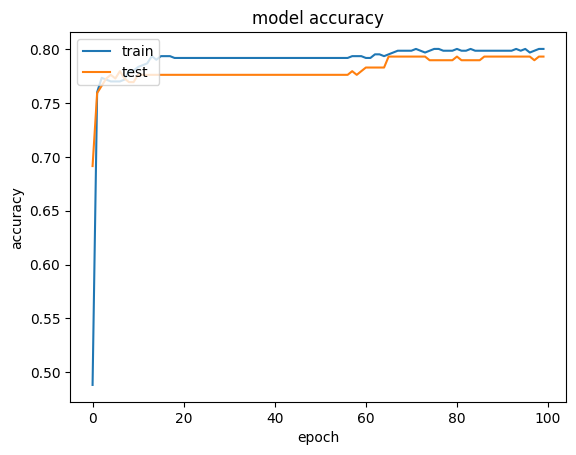

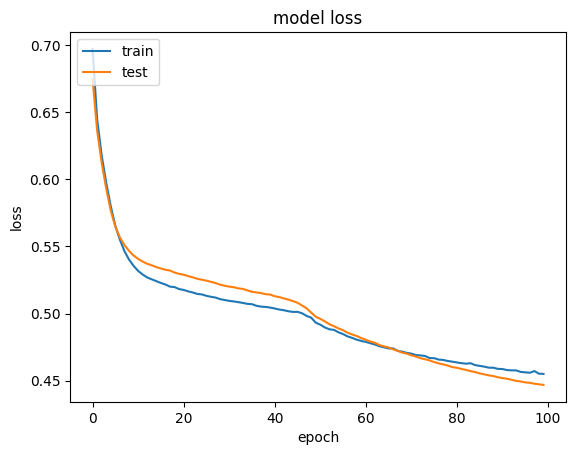

In [101]:
sc = MaxAbsScaler()
x_train = sc.fit_transform(x_train)



# Creation du modele
classifier_model = tf.keras.Sequential()
#Input layer with 5 inputs neurons
classifier_model.add(tf.keras.layers.Dense(3, activation = 'relu', input_dim = 5))
# #Input layer with 5 inputs neurons
# classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu', input_dim = 5))

# Hidden layer
# classifier_model.add(tf.keras.layers.Dense(3, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dense(2, activation = 'relu'))

# #Hidden layer
# classifier.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu'))

# Output layer with 1 output neuron which will predict 1 or 0
classifier_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# #output layer with 1 output neuron which will predict 1 or 0
# classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compilation du modele
classifier_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Entrainement du modele
history = classifier_model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)
# classifier_model.fit(x_train, y_train, batch_size = 10, epochs = 100)



# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
